In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

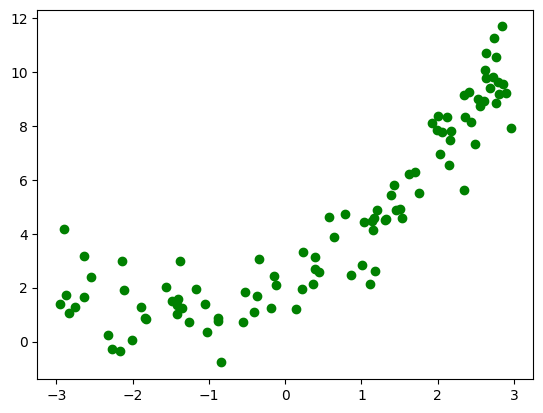

In [4]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# Quadratic Equation used - y = 0.5x^2+1.5x+2+Outliers
plt.scatter(X,y,color = 'g')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Simple Linear Regresion
from sklearn.linear_model import LinearRegression
regresor1 = LinearRegression()

In [7]:
regresor1.fit(X_train,y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
s2score = r2_score(y_test,regresor1.predict(X_test))
s2score

0.6570029054815509

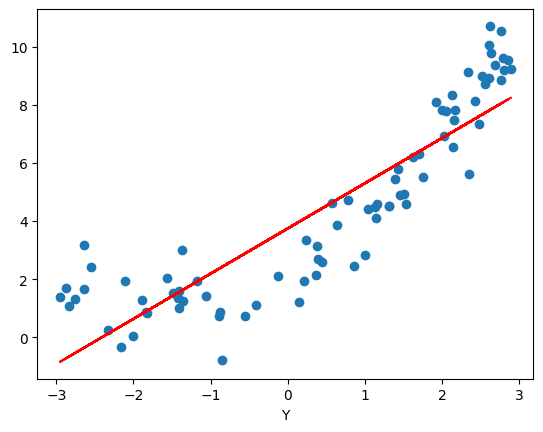

In [9]:
## Visualizze the Model
plt.plot(X_train,regresor1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X Dataset')
plt.xlabel('Y')
plt.show()

In [20]:
# Let's Apply polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [21]:
X_train_poly


array([[ 1.00000000e+00,  2.89168333e+00,  8.36183246e+00,
         2.41797715e+01],
       [ 1.00000000e+00, -2.00169960e+00,  4.00680127e+00,
        -8.02041248e+00],
       [ 1.00000000e+00,  3.96836283e-01,  1.57479035e-01,
         6.24933951e-02],
       [ 1.00000000e+00,  2.85161819e+00,  8.13172632e+00,
         2.31885787e+01],
       [ 1.00000000e+00,  2.02648034e+00,  4.10662256e+00,
         8.32198987e+00],
       [ 1.00000000e+00, -1.21930955e-01,  1.48671578e-02,
        -1.81276674e-03],
       [ 1.00000000e+00, -2.83865295e+00,  8.05795059e+00,
        -2.28737252e+01],
       [ 1.00000000e+00,  2.76892924e+00,  7.66696914e+00,
         2.12292951e+01],
       [ 1.00000000e+00, -1.40315619e+00,  1.96884729e+00,
        -2.76260027e+00],
       [ 1.00000000e+00,  1.62605613e+00,  2.64405853e+00,
         4.29938758e+00],
       [ 1.00000000e+00,  2.62967782e+00,  6.91520544e+00,
         1.81847624e+01],
       [ 1.00000000e+00, -1.56181159e+00,  2.43925545e+00,
      

In [22]:
#Simple Linear Regresion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regresor1 = LinearRegression()
regresor1.fit(X_train_poly,y_train)
s2score = r2_score(y_test,regresor1.predict(X_test_poly))
s2score

0.8656837017428874

In [23]:
print(regresor1.coef_)

[[ 0.00000000e+00  1.45468002e+00  4.59288739e-01 -1.10721058e-03]]


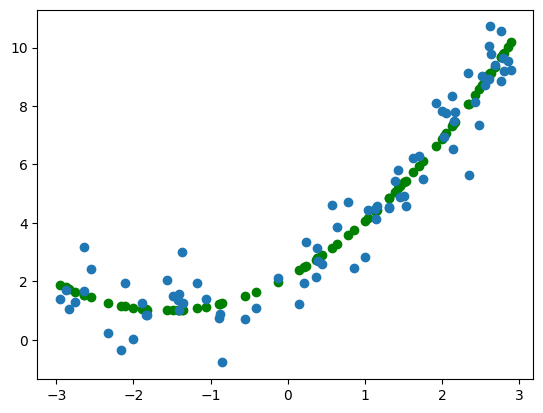

In [24]:
plt.scatter(X_train,regresor1.predict(X_train_poly),color = 'g')
plt.scatter(X_train,y_train)
plt.show()

In [25]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

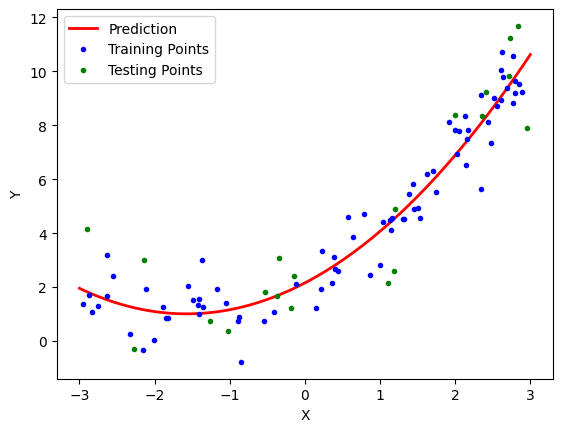

In [26]:
y_new = regresor1.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label="Prediction")
plt.plot(X_train,y_train,'b.',label="Training Points")
plt.plot(X_test,y_test,'g.',linewidth=2,label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## PipeLine Concepts

In [32]:
from sklearn.pipeline import Pipeline

def poly_regression(degreee):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree=degreee,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new,y_pred_new,'r', label = "Degree" + str(degreee),linewidth=2)
    plt.plot(X_train,y_train,'b.',linewidth=3)
    plt.plot(X_test,y_test,'g.',linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])

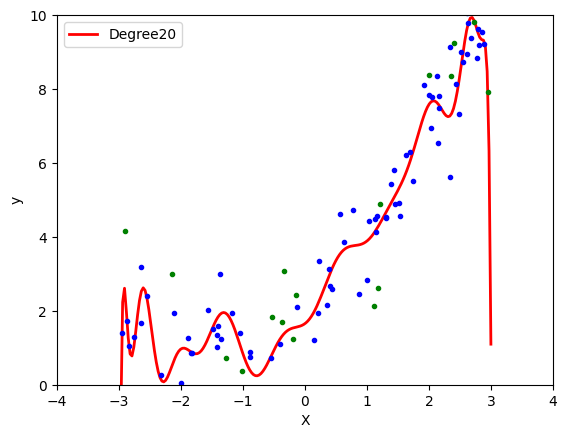

In [39]:
poly_regression(20)